<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo3/desafios/Desafio_aula2_modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#1) Pre-analise
---

---
## 1.1) Bibliotecas
---

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

---
#1.2) Funções de apoio
---

In [ ]:
def treino_teste(dados: pd.DataFrame , n: int, coluna: str) -> (pd.DataFrame, pd.DataFrame):
  '''
  -------------------------------------------------
  Divide o dados em um DataFrame de treino e teste
  -------------------------------------------------
  @param dados - DataFrame com todo os dados
  @param n - numero de termo no dataframe de treino
  @param colunas - nome da coluna 
  -------------------------------------------------
  @return retorna do df_treino, df_teste
  -------------------------------------------------
  '''
  df_treino = pd.DataFrame()
  df_treino['ds'] = dados['datahora'][:n]
  df_treino['y'] = dados[coluna][:n]

  df_teste = pd.DataFrame()
  df_teste['ds'] = dados['datahora'][n:]
  df_teste['y'] = dados[coluna][n:]

  return df_treino, df_teste

def treinamento(periodo: int , df_treino: pd.DataFrame):
  '''
  -------------------------------------------------
  Treina o modelo
  -------------------------------------------------
  @param periodo - quantidade de pontos previstos
  @param df_treino - dataframe de treino
  -------------------------------------------------
  @return retorna o modelo e a previsao
  -------------------------------------------------
  '''
  modelo = Prophet()
  modelo.fit(df_treino)
  df_futuro = modelo.make_future_dataframe(periods=periodo)
  previsao = modelo.predict(df_futuro)

  print(f'Numero de datas : {previsao.shape[0]}')

  return modelo, previsao 


## 1.3) Preparando os dados

In [ ]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo3/dados/dados_covid_sp.csv"

dados = pd.read_csv(uri, sep=";")

dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

dados_sp = dados.query('nome_munic == "São Paulo"')

dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


In [ ]:
dados_sp.shape

(443, 26)

---
# 2) Desafios
---

---
## 2.1) Desafio 08: Mudar os períodos de previsão.
---
Temos 443 medições. Eu vou treinar com todos os pontos e fazer previsão apartir de 443 assim não iram sobrar dados para testar o treinamento. Isso é errado, mas aqui eu só quero ver as previões sem me preocupar se elas esão boa ou não

In [ ]:
df_treino, df_teste = treino_teste(dados_sp, 443, 'casos_novos')

In [ ]:
modelo_50 , previao_50  = treinamento( 50, df_treino )
modelo_100, previao_100 = treinamento( 100, df_treino )

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Numero de datas : 493
Numero de datas : 543


In [ ]:
  primeira_data_treino = df_treino.iloc[0][0]
  ultima_data_treino = df_treino.iloc[-1][0]
  ultima_data_previsao = previao_100.iloc[-1][0]

  print(f'Primeira data treino    : {primeira_data_treino}')
  print(f'Ultima data treino      : {ultima_data_treino}')
  print(f'Ultima data da previsao : {ultima_data_previsao}')

Primeira data treino    : 2020-02-25 00:00:00
Ultima data treino      : 2021-05-12 00:00:00
Ultima data da previsao : 2021-08-20 00:00:00


(737480.0, 738022.0)

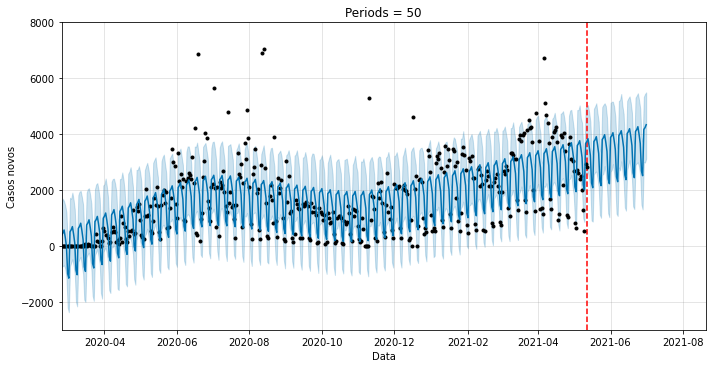

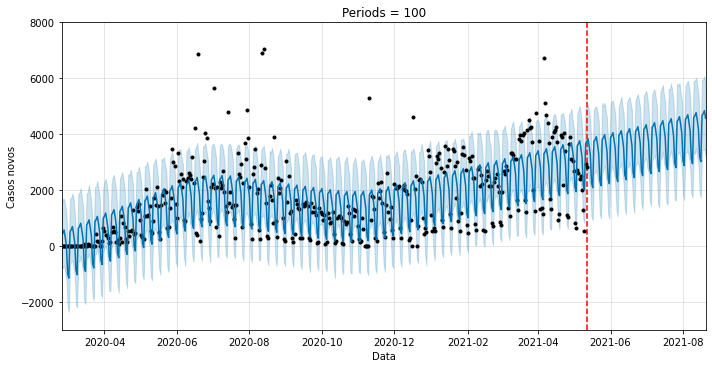

In [ ]:
fig = modelo_50.plot(previao_50, xlabel='Data', ylabel='Casos novos', figsize=(10, 5))

plt.vlines(x = ultima_data_treino, ymin=-3000, ymax=10000, ls = '--', colors='red')
plt.title('Periods = 50')
plt.ylim(-3000,8000)
plt.xlim(primeira_data_treino, ultima_data_previsao)

fig = modelo_100.plot(previao_100, xlabel='Data', ylabel='Casos novos', figsize=(10, 5))
plt.title('Periods = 100')
plt.vlines(x = ultima_data_treino, ymin=-3000, ymax=10000, ls = '--', colors='red')
plt.ylim(-3000,8000)
plt.xlim(primeira_data_treino, ultima_data_previsao)

---
## 2.2) Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.
---

In [ ]:
df_treino, df_teste = treino_teste(dados_sp, 400, 'casos_novos')
modelo , previsao  = treinamento( 43, df_treino )

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Numero de datas : 443


In [ ]:
primeira_data_treino = df_treino.iloc[0][0]
ultima_data_treino = df_treino.iloc[-1][0]
ultima_data_previsao = previao.iloc[-1][0]

print(f'Primeira data treino    : {primeira_data_treino}')
print(f'Ultima data treino      : {ultima_data_treino}')
print(f'Ultima data da previsao : {ultima_data_previsao}')

Primeira data treino    : 2020-02-25 00:00:00
Ultima data treino      : 2021-03-30 00:00:00
Ultima data da previsao : 2021-05-12 00:00:00


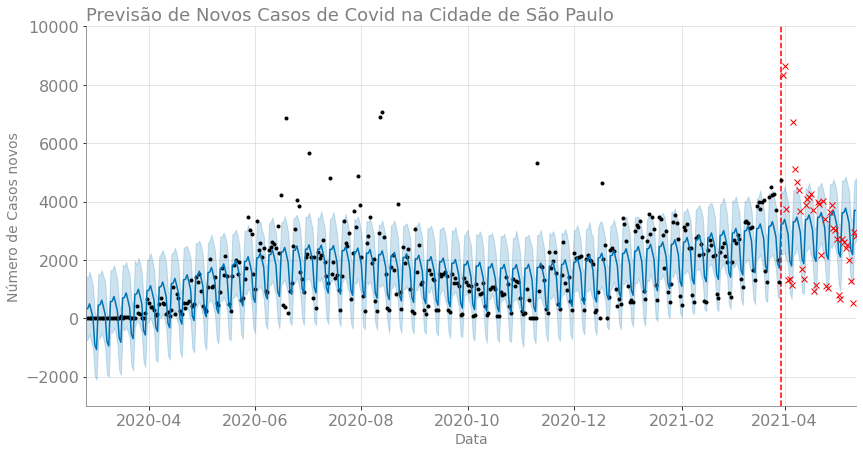

In [ ]:
fig = modelo.plot(previsao, figsize=(12, 6))
plt.plot(df_teste['ds'], df_teste['y'], marker='x', color='red', linestyle = 'None',)

ax = plt.gca()

plt.vlines(x = ultima_data_treino, ymin=-3000, ymax=10000, ls = '--', colors='red')
plt.title('Previsão de Novos Casos de Covid na Cidade de São Paulo', color='gray', fontsize=18, loc='left')
plt.ylabel('Número de Casos novos', color='gray', fontsize=14)
plt.xlabel('Data', color='gray', fontsize=14)
plt.ylim(-3000,10000)
plt.xlim(primeira_data_treino, ultima_data_previsao)

plt.xticks(fontsize= 16, color='gray')
plt.yticks(fontsize= 16, color='gray')

ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

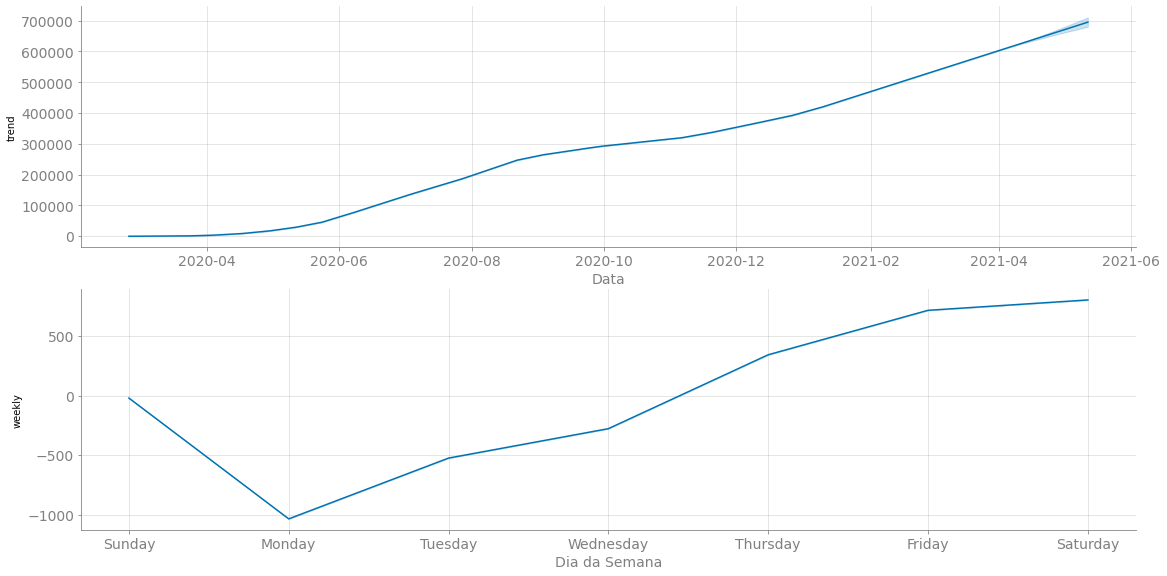

In [ ]:
fig = modelo.plot_components(previsao, figsize=(16, 8))

ax1, ax2 = fig.get_axes()

ax1.tick_params(axis="both", labelsize=14, colors='gray')
ax2.tick_params(axis="both", labelsize=14, colors='gray')

ax1.set_xlabel('Data'         , color='gray', fontsize=14)
ax2.set_xlabel('Dia da Semana', color='gray', fontsize=14)

ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

---
## 2.3) Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.
---

In [ ]:
total = dados_sp.shape[0]
n_treino = 400
n_previsao = total - n_treino

df_treino, df_teste = treino_teste(dados_sp, n_treino, 'casos')
modelo , previsao  = treinamento( n_previsao, df_treino )

primeira_data_treino = df_treino.iloc[0][0]
ultima_data_treino = df_treino.iloc[-1][0]
ultima_data_previsao = previao.iloc[-1][0]

print(f'Primeira data treino    : {primeira_data_treino}')
print(f'Ultima data treino      : {ultima_data_treino}')
print(f'Ultima data da previsao : {ultima_data_previsao}')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Numero de datas : 443
Primeira data treino    : 2020-02-25 00:00:00
Ultima data treino      : 2021-03-30 00:00:00
Ultima data da previsao : 2021-05-12 00:00:00


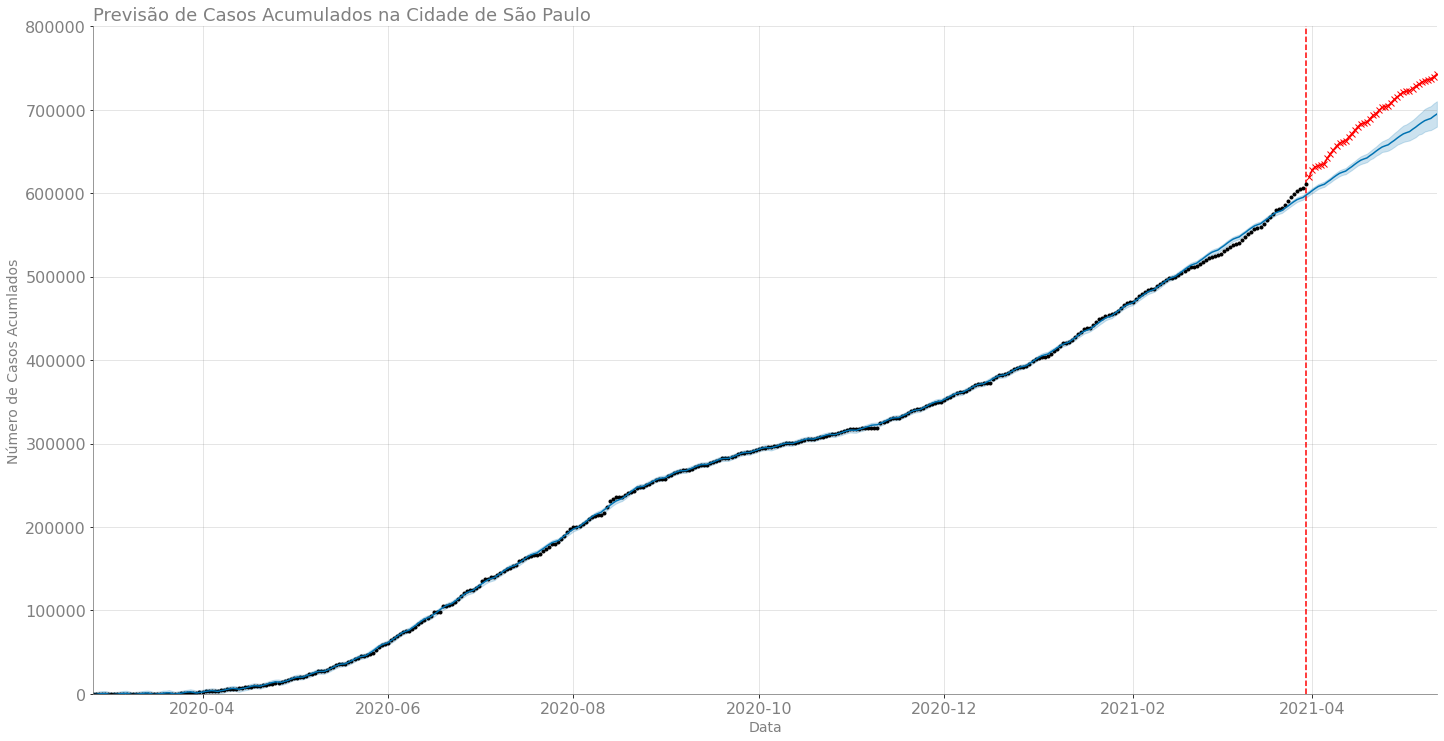

In [ ]:
fig = modelo.plot(previsao, plot_cap = False, figsize=(20, 10))

plt.plot(df_teste['ds'], df_teste['y'], marker='x', color='red')

ax = plt.gca()

plt.vlines(x = ultima_data_treino, ymin=0, ymax=800000, ls = '--', colors='red')
plt.title('Previsão de Casos Acumulados na Cidade de São Paulo', color='gray', fontsize=18, loc='left')
plt.ylabel('Número de Casos Acumlados', color='gray', fontsize=14)
plt.xlabel('Data', color='gray', fontsize=14)
plt.ylim(0,800000)
plt.xlim(primeira_data_treino, ultima_data_previsao)

plt.xticks(fontsize= 16, color='gray')
plt.yticks(fontsize= 16, color='gray')

ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

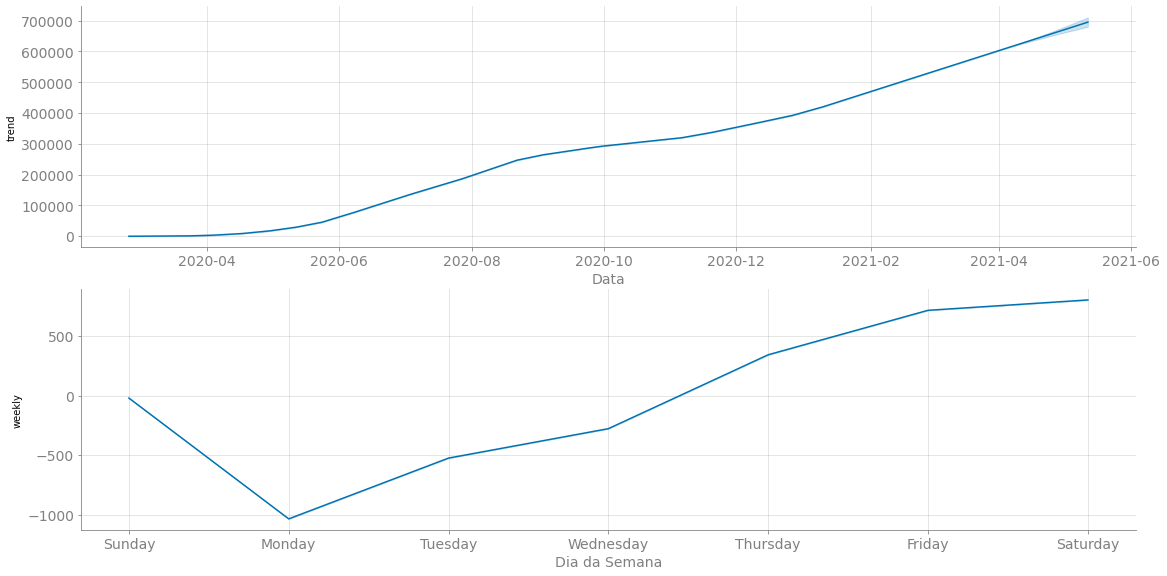

In [ ]:
fig = modelo.plot_components(previsao, figsize=(16, 8))

ax1, ax2 = fig.get_axes()

ax1.tick_params(axis="both", labelsize=14, colors='gray')
ax2.tick_params(axis="both", labelsize=14, colors='gray')

ax1.set_xlabel('Data'         , color='gray', fontsize=14)
ax2.set_xlabel('Dia da Semana', color='gray', fontsize=14)

ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['bottom'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)